# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [8]:
# Libraries
import numpy as np
from scipy import stats

import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

(array([1., 0., 2., 2., 1., 0., 0., 0., 3., 1.]),
 array([41.29285868, 43.03923869, 44.78561871, 46.53199872, 48.27837874,
        50.02475875, 51.77113877, 53.51751878, 55.2638988 , 57.01027881,
        58.75665883]),
 <a list of 10 Patch objects>)

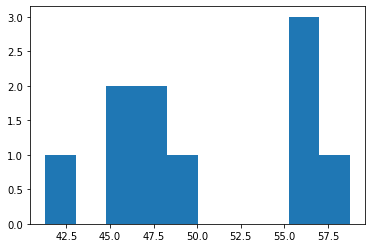

In [9]:
# mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] 

graph_1 = norm.rvs(50, 5, 10)
#norm.rvs(median, std, sample)

graph_1
plt.hist(graph_1)

(array([5., 3., 3., 8., 8., 8., 3., 7., 2., 3.]),
 array([38.98383163, 41.30836046, 43.63288929, 45.95741813, 48.28194696,
        50.60647579, 52.93100462, 55.25553346, 57.58006229, 59.90459112,
        62.22911995]),
 <a list of 10 Patch objects>)

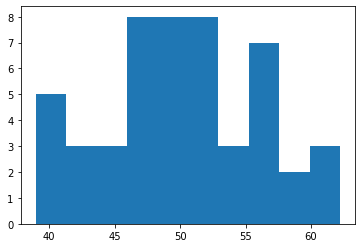

In [10]:
graph_2 = norm.rvs(50, 5, 50)

plt.hist(graph_2)

(array([  4.,  19.,  54.,  88., 118., 111.,  67.,  32.,   5.,   2.]),
 array([35.3884672 , 38.51862394, 41.64878067, 44.77893741, 47.90909415,
        51.03925088, 54.16940762, 57.29956436, 60.4297211 , 63.55987783,
        66.69003457]),
 <a list of 10 Patch objects>)

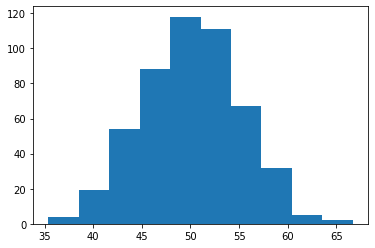

In [11]:
graph_3 = norm.rvs(50, 5, 500)

plt.hist(graph_3)

(array([  17.,   92.,  346.,  852., 1237., 1248.,  782.,  301.,  104.,
          21.]),
 array([33.1797752 , 36.55634478, 39.93291437, 43.30948395, 46.68605353,
        50.06262312, 53.4391927 , 56.81576228, 60.19233186, 63.56890145,
        66.94547103]),
 <a list of 10 Patch objects>)

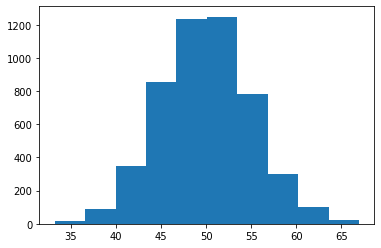

In [12]:
graph_4 = norm.rvs(50, 5, 5000)

plt.hist(graph_4)


#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [13]:
"""
In the graphs above, we can clearly see that the increment in sample size is adding consistency to the
distribution of our data.

In probability theory, the central limit theorem establishes that, in some situations, when 
independent random variables are added, their properly normalized sum tends toward a normal 
distribution even if the original variables themselves are not normally distributed.
"""

'\nIn the graphs above, we can clearly see that the increment in sample size is adding consistency to the\ndistribution of our data.\n\nIn probability theory, the central limit theorem establishes that, in some situations, when \nindependent random variables are added, their properly normalized sum tends toward a normal \ndistribution even if the original variables themselves are not normally distributed.\n'

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

(array([  17.,   92.,  346.,  852., 1237., 1248.,  782.,  301.,  104.,
          21.]),
 array([33.1797752 , 36.55634478, 39.93291437, 43.30948395, 46.68605353,
        50.06262312, 53.4391927 , 56.81576228, 60.19233186, 63.56890145,
        66.94547103]),
 <a list of 10 Patch objects>)

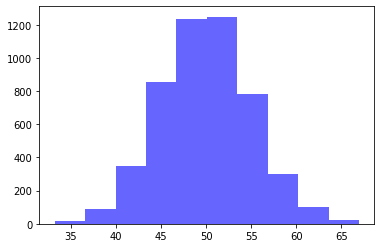

In [15]:
# your code here

plt.hist(graph_4,
        histtype='bar',
        color = 'blue',
        alpha = 0.6)

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [16]:
# your code here
 
# Import library and set canvas

from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Establish the relevant values

n, p = 5, 0.15
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')



x = np.arange(binom.ppf(0.01, n, p),
...               binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label="binom pmf - prob mass function")
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

SyntaxError: invalid syntax (<ipython-input-16-d0c1e47ee363>, line 17)

0.024384374999999996
0.9977725
0.75
0.6375
0.7984359711335656
[1 0 0 0 2 0 2 2 1 1 0 1 1 1 0]


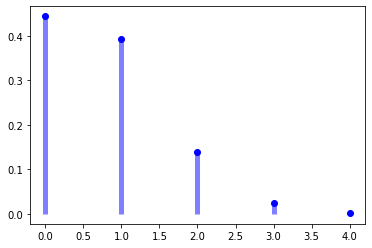

In [17]:
# importing libraries
%matplotlib inline
from scipy import stats
from scipy.stats import binom

n=5
p=0.15

binomial = binom(n,p)
print(binomial.pmf(3))
print(binomial.cdf(3))
print(binomial.mean())
print(binomial.var())
print(binomial.std())
print(binomial.rvs(15))
x = np.arange(0,5)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

In [18]:
# run this code
#x = range(n)

#fig, ax = plt.subplots(1, 1)

#plt.plot(x, dist.pmf(x))

#plt.show()

#### Step 3: Explain what you observe from the plot above.

In [19]:
"""
What we can see from the plot above is that the chance that all the sample participants click on the Youtube
advert, reduces when the amount of sample increases.
It is much less porbable than 4 of 5 users all click the advert, that one of 5 clicks the advert.
"""

'\nWhat we can see from the plot above is that the chance that all the sample participants click on the Youtube\nadvert, reduces when the amount of sample increases.\nIt is much less porbable than 4 or 5 users all click the advert, that one clicks the advert.\n'

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

0.0318580622912185
0.04604657889230179
7.5
6.375
2.5248762345905194
[ 6  8 12  7  8  8  9  5  6  8  3  8 11  7  7]


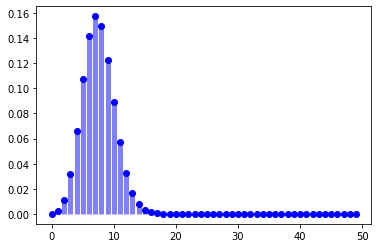

In [20]:
%matplotlib inline
from scipy import stats
from scipy.stats import binom

n=50
p=0.15

binomial = binom(n,p)
print(binomial.pmf(3))
print(binomial.cdf(3))
print(binomial.mean())
print(binomial.var())
print(binomial.std())
print(binomial.rvs(15))
x = np.arange(0,50)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

5.829462320231393e-31
6.03303090676686e-31
75.0
63.75
7.984359711335656
[70 61 74 77 77 71 88 72 67 80 68 79 73 64 71]


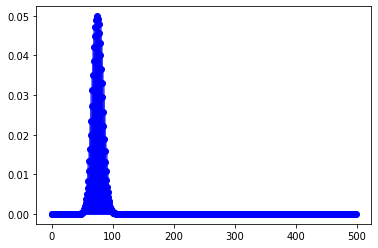

In [21]:
%matplotlib inline
from scipy import stats
from scipy.stats import binom

n=500
p=0.15

binomial = binom(n,p)
print(binomial.pmf(3))
print(binomial.cdf(3))
print(binomial.mean())
print(binomial.var())
print(binomial.std())
print(binomial.rvs(15))
x = np.arange(0,500)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

0.0
0.0
750.0
637.5
25.248762345905195
[780 726 733 723 736 757 722 728 757 750 776 723 742 769 780]


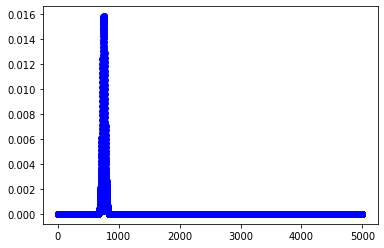

In [22]:
%matplotlib inline
from scipy import stats
from scipy.stats import binom

n=5000
p=0.15

binomial = binom(n,p)
print(binomial.pmf(3))
print(binomial.cdf(3))
print(binomial.mean())
print(binomial.var())
print(binomial.std())
print(binomial.rvs(15))
x = np.arange(0,5000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [ ]:
"""
As the sample of people grows, the statement mentioned above is even stronger.
The chances that a very high number of users all click on the Youtube ad are neglegible.
As the sample tends to go to infinite numbers, the probability equates to 0.
"""

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
"""
The event can only be measured as occurring or not as occurring, meaning the variable can only be measured 
in whole numbers.
The Poisson Distribution is used to predict how many times something might happen in a specific timeframe. 
It was used to estimate the annual number of Prussian cavalry soldiers killed due to horse-kicks.
It is also use to model the spread of an illness.
"""

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [ ]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=300, size=10000)


In [ ]:
x = np.arange(poisson.ppf(0.01, mu),
...               poisson.ppf(0.99, mu))
>>> ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
>>> ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

300.0


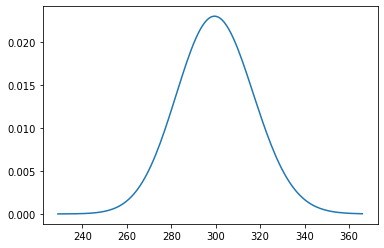

In [28]:
# This graph visualizes the overall analysis...

from scipy.stats import poisson

mu = 300

mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print(mean)

x = np.arange(poisson.ppf(0.00001, mu), poisson.ppf(0.9999, mu))
plt.plot(x, poisson.pmf(x, mu), ms=8, label='poisson pmf')
plt.show()

In [29]:
# When we define a new x, in this case 320 visits, we will get back the following probablity

visits_320 = poisson.pmf(320,mu)
visits_320

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [30]:
# your code here

visits_60 = poisson.pmf(60,mu)
visits_60

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [44]:
mu=300

visits_0_1000 = poisson.pmf(range(0,1000),mu)
len(visits_0_1000)

1000

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

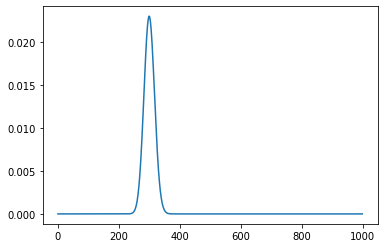

In [46]:
# Let´s now plot the data

plt.plot(visits_0_1000)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [ ]:
# Since the sample is high, we can assume that the Central Limit Theorem is established, therefore we can use
# formula reasoning of Normal Distribution

In [63]:
# your code here

# sigma = std/(n)**0.5

n = 200
sigma = 8/(200**0.5)

# cdf Probability that the mean delivery time is <=30
p_30 = norm.cdf(30, loc=35, scale=sigma)
p_30


4.836102065938057e-19

In [64]:
# cdf Probability that the mean delivery time is <=35
p_35 = norm.cdf(35, loc=35, scale=sigma)
p_35

0.5

In [65]:
# Probability that the mean delivery time is between 30 and 35

p30_x_35 = p_35 - p_30

p30_x_35

0.5

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [66]:
# your code here

# Let´s convert >115 hours to minutes. 115 * 60 = 6,900. (115/200)*60 = 34.5

# We will need to find the cdf of P(X >= 6,900) and then substract the value from 1

n = 200
sigma = 8/(200**0.5)
#loc = mean

# cdf Probability that the mean delivery time is <= 6,900

p_6900 = norm.cdf(34.5, loc=35, scale=sigma)

p_6900

# probability that in total, it takes more than 115 hours to deliver all 200 packages

p_x = 1 - p_6900
p_x

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [4]:
normal = norm() 
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals)
           
r = norm.rvs(size=1000)

SyntaxError: invalid syntax (<ipython-input-4-bf72d5a1114d>, line 5)

In [ ]:
# your code here

normal = norm() 

print(normal.pdf(2))
print(normal.cdf(4))       
print(normal.rvs()) 

# plotting
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,30,1000)
y = norm.pdf(x, loc = 5, scale = 1)
ax.plot(x,y)
plt.show()

In [1]:
# your code here

normal = norm() 

print(normal.pdf(2))
print(normal.cdf(4))       
print(normal.rvs()) 

# plotting
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,30,)
y = norm.cdf(x, loc = 5, scale = 1)
ax.plot(x,y)
plt.show()

NameError: name 'norm' is not defined

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [ ]:
# your code here

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [ ]:
# your code here

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [ ]:
# your code here

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [ ]:
# your code here

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [ ]:
# your code here

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [ ]:
# your code here

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [ ]:
# your code here